# Long COVID coding in primary care

This notebook follows on from our [published paper](https://bjgp.org/content/early/2021/06/28/BJGP.2021.0301/tab-article-info), and contains much of the same analysis. It is intended to be updated regularly.

## Background


## Methods

Working on behalf of NHS England, we used OpenSAFELY data encompassing 96% of the English population between 2020-02-01 and 2021-04-25. We measured the proportion of people with a recorded code for long COVID, overall and by demographic factors, electronic health record software system (EMIS or TPP), and week.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
from IPython.display import display, Markdown
import pandas as pd
pd.set_option("display.max_rows", 200)
import local_graphs

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))
%matplotlib inline

### Report last updated **29 Jul 2021**

In [3]:
tpp = local_graphs.counts_table_read("output")
total_tpp = tpp.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_tpp = total_tpp.sum()
total_tpp

No long COVID    24006953.0
Long COVID           5011.0
dtype: float64

In [4]:
emis = local_graphs.counts_table_read("emis")
emis = emis.rename(index={"RGN11NM": "region", "East of England": "East"})
total_emis = emis.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_emis = total_emis.sum()
total_emis

No long COVID    34014268.0
Long COVID          18262.0
dtype: float64

In [5]:
totals = tpp[["No long COVID", "Long COVID"]] + emis[["No long COVID", "Long COVID"]]

In [6]:
table_list = [tpp, emis, totals]
all_patients = [local_graphs.add_cols(df) for df in table_list]
table_1 = [local_graphs.get_percentages(df) for df in all_patients]
pd.concat(table_1, keys=['TPP','EMIS', "Totals"],axis=1,join="inner")#.swaplevel(0,1,axis=1).sort_index(level=0, axis=1)

TPP                EMIS        \
                                   Patient count     % Patient count     %   
Attribute Category                                                           
age_group 0-17                         4821223.0  0.20     6901845.0  0.20   
          18-24                        1901509.0  0.08     2884964.0  0.08   
          25-34                        3340123.0  0.14     4962526.0  0.15   
          35-44                        3220499.0  0.13     4745812.0  0.14   
          45-54                        3230861.0  0.13     4546614.0  0.13   
          55-69                        4202414.0  0.18     5697231.0  0.17   
          70-79                        2080859.0  0.09     2699998.0  0.08   
          80+                          1214476.0  0.05     1593540.0  0.05   
sex       F                           12004974.0  0.50    17014169.0  0.50   
          M                           12006990.0  0.50    17018361.0  0.50   
region    East                         5638753.0  0.23     1341520.0  0.04   
          East Midlands                4191051.0  0.17      763830.0  0.02   
          London                       1702673.0  0.07     7804070.0  0.23   
          North East                   1100356.0  0.05     1189619.0  0.03   
          North West                   2067131.0  0.09     6875180.0  0.20   
          South East                   1582440.0  0.07     7191261.0  0.21   
          South West                   3304393.0  0.14     2488558.0  0.07   
          West Midlands                 988286.0  0.04     5057090.0  0.15   
          Yorkshire and The Humber     3427713.0  0.14     1278147.0  0.04   
imd       0                             586403.0  0.02      102250.0  0.00   
          1                            4818642.0  0.20     7015392.0  0.21   
          2                            4707307.0  0.20     7244664.0  0.21   
          3                            4941725.0  0.21     6633133.0  0.19   
          4                            4655595.0  0.19     6401478.0  0.19   
          5                            4302292.0  0.18     6635613.0  0.19   
ethnicity 1                           14573038.0  0.84    17948460.0  0.78   
          2                             319793.0  0.02      592737.0  0.03   
          3                            1500012.0  0.09     2540104.0  0.11   
          4                             515866.0  0.03     1193366.0  0.05   
          5                             476065.0  0.03      768879.0  0.03   

                                          Totals        
                                   Patient count     %  
Attribute Category                                      
age_group 0-17                        11723068.0  0.20  
          18-24                        4786473.0  0.08  
          25-34                        8302649.0  0.14  
          35-44                        7966311.0  0.14  
          45-54                        7777475.0  0.13  
          55-69                        9899645.0  0.17  
          70-79                        4780857.0  0.08  
          80+                          2808016.0  0.05  
sex       F                           29019143.0  0.50  
          M                           29025351.0  0.50  
region    East                         6980273.0  0.12  
          East Midlands                4954881.0  0.09  
          London                       9506743.0  0.16  
          North East                   2289975.0  0.04  
          North West                   8942311.0  0.15  
          South East                   8773701.0  0.15  
          South West                   5792951.0  0.10  
          West Midlands                6045376.0  0.10  
          Yorkshire and The Humber     4705860.0  0.08  
imd       0                             688653.0  0.01  
          1                           11834034.0  0.20  
          2                           11951971.0  0.21  
          3                           1157485

In [7]:
table_2 = [df.drop(columns="No long COVID") for df in table_list]
table_2[2] = local_graphs.get_percentages(table_2[2])
table_2[2].columns = table_2[2].columns.droplevel(1)
table_2[2]["Rate per 100,000"] = ((table_2[2]["Patient count"] / all_patients[2]) * 100000).round(1)
pd.concat(table_2, keys=['TPP','EMIS', "Totals"], axis=1 ,join="inner")#.swaplevel(0,1,axis=1).sort_index(level=0, axis=1)

TPP                         \
                                   Long COVID Rate per 100,000     %   
Attribute Category                                                     
age_group 0-17                           94.0              1.9   1.9   
          18-24                         177.0              9.3   3.5   
          25-34                         592.0             17.7  11.8   
          35-44                        1033.0             32.1  20.6   
          45-54                        1392.0             43.1  27.8   
          55-69                        1361.0             32.4  27.2   
          70-79                         261.0             12.5   5.2   
          80+                           101.0              8.3   2.0   
sex       F                            3227.0             26.9  64.4   
          M                            1784.0             14.9  35.6   
region    East                          913.0             16.2  18.2   
          East Midlands                 775.0             18.5  15.5   
          London                        265.0             15.6   5.3   
          North East                    328.0             29.8   6.5   
          North West                    395.0             19.1   7.9   
          South East                    593.0             37.5  11.8   
          South West                    797.0             24.1  15.9   
          West Midlands                 288.0             29.1   5.7   
          Yorkshire and The Humber      655.0             19.1  13.1   
imd       0                             118.0             20.1   2.4   
          1                             912.0             18.9  18.2   
          2                             970.0             20.6  19.4   
          3                            1049.0             21.2  20.9   
          4                            1013.0             21.8  20.2   
          5                             949.0             22.1  18.9   
ethnicity 1                            3393.0             23.3  84.8   
          2                              63.0             19.7   1.6   
          3                             392.0             26.1   9.8   
          4                              91.0             17.6   2.3   
          5                              63.0             13.2   1.6   

                                         EMIS                         \
                                   Long COVID Rate per 100,000     %   
Attribute Category                                                     
age_group 0-17                          248.0              3.6   1.4   
          18-24                         684.0             23.7   3.7   
          25-34                        2267.0             45.7  12.4   
          35-44                        4077.0             85.9  22.3   
          45-54                        5183.0            114.0  28.4   
          55-69                        4869.0             85.5  26.7   
          70-79                         693.0             25.7   3.8   
          80+                           241.0             15.1   1.3   
sex       F                           11893.0             69.9  65.1   
          M                            6369.0             37.4  34.9   
region    East                          505.0             37.6   2.8   
          East Midlands                 314.0             41.1   1.7   
          London                       5021.0             64.3  27.5   
          North East                    628.0             52.8   3.4   
          North West                   4185.0             60.9  22.9   
          South East                   3463.0             48.2  19.0   
          South West                   1004.0             40.3   5.5   
          West Midlands                2598.0             51.4  14.2   
          Yorkshire and The Humber      528.0             41.3   2.9   
imd       0                              41.0             40.1   0.2   
         

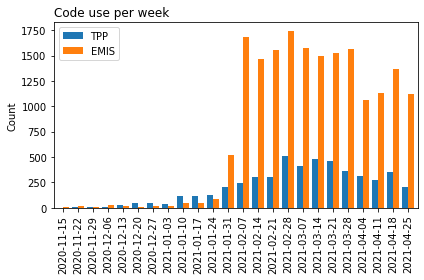

In [8]:
local_graphs.code_use_per_week_graph()

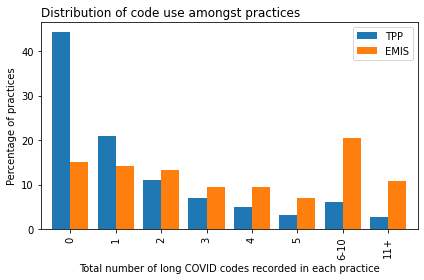

In [9]:
local_graphs.practice_distribution_graph()